<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 6:  Web Scraping
### Finding Underpriced RVs on Craigslist

![](https://snag.gy/WrdUMx.jpg)

In this project we will be practicing our web scraping skills.  You can use Scrapy or Python requests in order to complete this project.  It may be helpful to write some prototype code in this notebook to test your assumptions, then move it into a Python file that can be run from the command line.

> In order to run code from the command line, instead of the notebook, you just need to save your code to a file (with a .py extension), and run it using the Python interpreter:<br><br>
> `python my_file.py`

You will be building a process to scrape a single category of search results on Craigslist, that can easily be applied to other categories by changing the search terms.  The main goal is to be able to target and scrape a single page given a set of parameters.

**If you use Scrapy, provide your code in a folder.**

## Import your libraries for scrapy / requests / pandas / numpy / etc
Setup whichever libraries you need. Review past material for reference.

In [407]:
# PREPARE REQUIRED LIBRARIES
import pandas as pd
import numpy as np
from scrapy.selector import Selector
from scrapy.http import HtmlResponse
import requests

#plt.style.use('fivethirtyeight')

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1.  Scrape for the largest US cities (non-exhaustive list)
Search, research, and scrape Wikipedia for a list of the largest US cities.  There are a few sources but find one that is in a nice table.  We don't want all cities, just signifficant cities.  Examine your source.  Look for what can be differentiable.

- Use requests
- Build XPath query(ies)
- Extract to a list
- Clean your list

In [272]:
# SCRAPE WIKIPEDIA FOR LARGEST US CITIES (NON-EXHAUSTIVE LIST)

response = requests.get("https://simple.wikipedia.org/wiki/List_of_United_States_cities_by_population")
HTML = response.text 
HTML[0:500] 


u'<!DOCTYPE html>\n<html class="client-nojs" lang="en" dir="ltr">\n<head>\n<meta charset="UTF-8"/>\n<title>List of United States cities by population - Simple English Wikipedia, the free encyclopedia</title>\n<script>document.documentElement.className = document.documentElement.className.replace( /(^|\\s)client-nojs(\\s|$)/, "$1client-js$2" );</script>\n<script>(window.RLQ=window.RLQ||[]).push(function(){mw.config.set({"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgP'

In [289]:
#cities = Selector(text=HTML).xpath('//table/tbody/tr/td[2]/a/text()').extract()
cities = Selector(text=HTML).xpath('//table/tr/td[2]/a/text()').extract()
cities
df = pd.DataFrame(cities[0:20]) 
df.columns=["largest_cities"]

In [290]:
df

,largest_cities
0,New York
1,Los Angeles
2,Chicago
3,Houston
4,Philadelphia
5,Phoenix
6,San Antonio
7,San Diego
8,Dallas
9,San Jose


<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1.2 Only retain cities with properly formed ASCII

Optionally, filter out any cities with impropper ASCII characters.  A smaller list will be easier to look at.  However you may not need to filter these if you spend more time scraping a more concise city list.  This list should help you narrow down the list of regional Craigslist sites.

In [291]:
# ONLY RETAIN PROPERLY FORMED CITIES WITH FILTERING FUNCTION
df = df[((df['largest_cities'] != 'San Jose') & (df['largest_cities'] != 'Fort Worth'))]

In [294]:
df = df.reset_index()
df = df[['largest_cities']]
df

,largest_cities
0,New York
1,Los Angeles
2,Chicago
3,Houston
4,Philadelphia
5,Phoenix
6,San Antonio
7,San Diego
8,Dallas
9,Austin


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2.  Write a function to capture current pricing information via Craigslist in one city.
Choose a city from your scraped data, then go to the cooresponding city section on Craigslist, searching for "rv" in the auto section.  Write a method that pulls out the prices.

In [295]:
def get_rv_prices(city):
    city = city.replace(" ","").lower()
    url = 'https://' + city + '.craigslist.org/search/rvs'
    response = requests.get(url)
    HTML = response.text 

    prices = Selector(text=HTML).xpath('//div[@class="rows"]//span[@class="price"]/text()').extract()
    return prices

   

In [107]:
get_rv_prices('Austin') 

[u'$9500',
 u'$9500',
 u'$5500',
 u'$5500',
 u'$8900',
 u'$8900',
 u'$4650',
 u'$4650',
 u'$20000',
 u'$20000',
 u'$39995',
 u'$39995',
 u'$750',
 u'$750',
 u'$4995',
 u'$4995',
 u'$9000',
 u'$9000',
 u'$22000',
 u'$22000',
 u'$9300',
 u'$9300',
 u'$29000',
 u'$29000',
 u'$10500',
 u'$10500',
 u'$6900',
 u'$6900',
 u'$2500',
 u'$2500',
 u'$22000',
 u'$22000',
 u'$8500',
 u'$8500',
 u'$6400',
 u'$6400',
 u'$2800',
 u'$2800',
 u'$4500',
 u'$4500',
 u'$18500',
 u'$18500',
 u'$9500',
 u'$9500',
 u'$5995',
 u'$5995',
 u'$75',
 u'$75',
 u'$3200',
 u'$3200',
 u'$3000',
 u'$3000',
 u'$17000',
 u'$17000',
 u'$12000',
 u'$12000',
 u'$9000',
 u'$9000',
 u'$20500',
 u'$20500',
 u'$2400',
 u'$2400',
 u'$7950',
 u'$7950',
 u'$2850',
 u'$2850',
 u'$75',
 u'$75',
 u'$300',
 u'$300',
 u'$1000',
 u'$1000',
 u'$23500',
 u'$23500',
 u'$13000',
 u'$13000',
 u'$93000',
 u'$93000',
 u'$28369',
 u'$28369',
 u'$6500',
 u'$6500',
 u'$2500',
 u'$2500',
 u'$94995',
 u'$94995',
 u'$3500',
 u'$3500',
 u'$14750',
 u

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2.1 Create a mapping of cities to cooresponding regional Craigslist URLs

Major US cities on Craigslist typically have their own cooresponding section (ie: SFBay Area, NYC, Boston, Miami, Seattle, etc).  Later, you will use these to query search results for various metropolitian regions listed on Craigslist.  Between the major metropolitan Craigslist sites, the only thing that will differ is the URL's that correspond to them.

The point of the "mapping":  Create a data structure that allows you to iterate with both the name of the city from Wikipedia, with the cooresponding variable that that will allow you to construct each craigslist URL for each region.

> For San Francsico (the Bay Area metropolitan area), the url for the RV search result is:
> http://sfbay.craigslist.org/search/sss?query=rv
>
> The convention is http://[region].craigslist.org/search/sss?query=rf
> Replacing [region] with the cooresponding city name will allow you to quickly iterate through each regional Craigslist site, and scrape the prices from the search results.  Keep this in mind while you build this "mapping".


In [296]:
for i, c in enumerate(df['largest_cities']):
    c = c.replace(" ","").lower()
    df.ix[i,'url'] = 'https://' + c + '.craigslist.org/search/sss?query=rv'
             
df


,largest_cities,url
0,New York,https://newyork.craigslist.org/search/sss?quer...
1,Los Angeles,https://losangeles.craigslist.org/search/sss?q...
2,Chicago,https://chicago.craigslist.org/search/sss?quer...
3,Houston,https://houston.craigslist.org/search/sss?quer...
4,Philadelphia,https://philadelphia.craigslist.org/search/sss...
5,Phoenix,https://phoenix.craigslist.org/search/sss?quer...
6,San Antonio,https://sanantonio.craigslist.org/search/sss?q...
7,San Diego,https://sandiego.craigslist.org/search/sss?que...
8,Dallas,https://dallas.craigslist.org/search/sss?query=rv
9,Austin,https://austin.craigslist.org/search/sss?query=rv


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Define a function to caculate mean and median price per city.

Now that you've created a list of cities you want to scrape, adapt your solution for grabbing data in one region site, to grab data for all regional sites that you collected, then calculate the mean and median price of RV results from each city.

> Look at the URLs from a few different regions (ie: portland, phoenix, sfbay), and find what they have in common.  Determine the area in the URL string that needs to change the least, and figure out how to replace only that portion of the URL in order to iterate through each city.

In [297]:
def get_rv_mean_med(url):

    response = requests.get(url)
    HTML = response.text 

    prices = Selector(text=HTML).xpath('//div[@class="rows"]//span[@class="price"]/text()').extract()
    new_prices = []
    for p in prices:
        p = float(p.replace('$',''))
        new_prices.append(p)

    return new_prices




In [298]:
for i, u in enumerate(df['url']):
    prices = get_rv_mean_med(u)
    df.ix[i,'mean_price'] = np.mean(prices)
    df.ix[i,'median_price'] = np.median(prices) 

In [299]:
df

,largest_cities,url,mean_price,median_price
0,New York,https://newyork.craigslist.org/search/sss?quer...,13192.046512,1500.0
1,Los Angeles,https://losangeles.craigslist.org/search/sss?q...,52027.195652,9600.0
2,Chicago,https://chicago.craigslist.org/search/sss?quer...,8679.283582,375.0
3,Houston,https://houston.craigslist.org/search/sss?quer...,38804.714286,26053.0
4,Philadelphia,https://philadelphia.craigslist.org/search/sss...,20019.112360,3000.0
5,Phoenix,https://phoenix.craigslist.org/search/sss?quer...,30047.923913,26465.0
6,San Antonio,https://sanantonio.craigslist.org/search/sss?q...,37431.000000,25489.0
7,San Diego,https://sandiego.craigslist.org/search/sss?que...,15935.746835,280.0
8,Dallas,https://dallas.craigslist.org/search/sss?query=rv,23038.300000,19995.0
9,Austin,https://austin.craigslist.org/search/sss?query=rv,29665.904762,25557.0


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Run your scraping process, and save your results to a CSV file.

In [600]:
df['url'].values

array([u'https://newyork.craigslist.org/search/sss?query=rv',
       u'https://losangeles.craigslist.org/search/sss?query=rv',
       u'https://chicago.craigslist.org/search/sss?query=rv',
       u'https://houston.craigslist.org/search/sss?query=rv',
       u'https://philadelphia.craigslist.org/search/sss?query=rv',
       u'https://phoenix.craigslist.org/search/sss?query=rv',
       u'https://sanantonio.craigslist.org/search/sss?query=rv',
       u'https://sandiego.craigslist.org/search/sss?query=rv',
       u'https://dallas.craigslist.org/search/sss?query=rv',
       u'https://austin.craigslist.org/search/sss?query=rv',
       u'https://jacksonville.craigslist.org/search/sss?query=rv',
       u'https://sanfrancisco.craigslist.org/search/sss?query=rv',
       u'https://indianapolis.craigslist.org/search/sss?query=rv',
       u'https://columbus.craigslist.org/search/sss?query=rv',
       u'https://charlotte.craigslist.org/search/sss?query=rv',
       u'https://detroit.craigslist.org/se

In [300]:
df.to_csv('rvs.csv')

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Do an analysis of the RV market.

Go head we'll wait.  Anything notable about the data?

In [266]:
import pandas as pd
import seaborn as sns
import numpy as np
#import matplotlib as plt
import matplotlib.pyplot as plt
import scipy as stats
%matplotlib inline

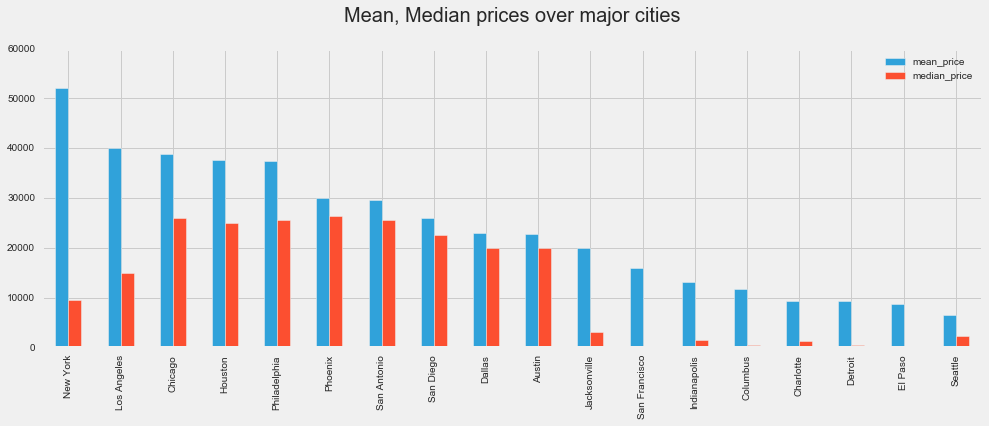

In [408]:
fig = plt.figure(figsize=(15,5))
ax = fig.gca()

df[['mean_price','median_price']].sort_values('mean_price',ascending=0).plot.bar(stacked=False, ax=ax)
ax.set_title('Mean, Median prices over major cities\n', fontsize=20)
ax.set_xticklabels(df['largest_cities'])
plt.show()


In [ ]:
New York is selling some fancy-expensive RVs.
Dallas and San Diego have balance in their pricing.


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 5.1 Does it makes sense to buy RVs in one region and sell them in another?

Assuming the cost of shipping or driving from one regional market to another.

In [ ]:
One could benefit from buying an RV in Seattle, having a fun roadtrip, and then selling it in NY.

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 5.2 Can you pull out the "make" from the markup and include that in your analyis?
How reliable is this data and does it make sense?

In [476]:
def get_title(url,city):

    response = requests.get(url)
    HTML = response.text 

    prices = Selector(text=HTML).xpath('//div[@class="rows"]//span[@class="price"]/text()').extract()
    titles = Selector(text=HTML).xpath('//div[@class="rows"]//a[@class="hdrlnk"]/text()').extract()
    new_prices = []
    for p in prices:
        p = float(p.replace('$',''))
        new_prices.append(p)
    df = pd.DataFrame([titles, new_prices]).T
    df['city'] = city

    return df

In [586]:
dft = pd.DataFrame()
dfc = pd.DataFrame()
for i, u in enumerate(df['url']):
    dft = get_title(u, df.ix[i,'largest_cities'])
    dfc =pd.concat([dfc,dft], axis=0) 

dfc.rename(columns={0:'title',1:'price'}, inplace=True)
dfc = dfc.reset_index(drop=True)

In [587]:
dfc.head(3)

,title,price,city
0,2003 National RV Dolphin,37500,New York
1,2003 National RV Dolphin,37500,New York
2,'92 TOYOTA RV,37500,New York


In [594]:
def get_make(row):
    title = row['title']

    if not isinstance(title, float):
    
        if "toyota" in title.lower():
            row['make'] = "Toyota"
        elif "chevy" in title.lower():
            row['make'] = "Chevy"
        elif "winnebago" in title.lower():
            row['make'] = "Winnebago"
        elif "national" in title.lower():
            row['make'] = "National"
        elif "ford" in title.lower():
            row['make'] = "Ford"
        elif "airstream" in title.lower():
            row['make'] = "Airstream"
        elif "honda" in title.lower():
            row['make'] = "Honda"
        elif "coachman" in title.lower():
            row['make'] = "Coachman"
        elif "eurovan" in title.lower():
            row['make'] = "Eurovan"
        elif "dutchmen" in title.lower():
            row['make'] = "Dutchmen"
        elif "cruiser " in title.lower():
            row['make'] = "Cruiser "
        else:
            row['make'] = "Other"
    else:
        row['make'] = None

    return row

def clean_year(row):
    try:
        year = str(row['year'])
        year = year[0:2]

        if year == '20' or year == '19':
            row['year'] = row['year']
        else:
            row['year'] = np.nan
    except:
        row['year'] = np.nan

    return row




In [601]:

dfc['make'] = 'Other'
dfc.apply(get_make, axis=1)
dfc['year'] = dfc['title'].str[0:4]
dfc.apply(clean_year, axis=1)
dfc.head(20)

,title,price,city,make,year
0,2003 National RV Dolphin,37500,New York,National,2003
1,2003 National RV Dolphin,37500,New York,National,2003
2,'92 TOYOTA RV,37500,New York,Toyota,NaN
3,2003 National RV Dolphin,37500,New York,National,2003
4,2003 National RV Dolphin,3000,New York,National,2003
5,2003 National RV Dolphin,3000,New York,National,2003
6,2001 Chevy Express RV Cutaway Shuttle Bus ** T...,37500,New York,Chevy,2001
7,Boss RV-6 Digital Reverb Pedal,37500,New York,Other,NaN
8,Gelatoshow 24 Pan Gelato Case Model VG-RV-220-UL,37500,New York,Other,NaN
9,Wanted - RV Lot parking pass NC State football,37500,New York,Other,NaN


In [596]:
dfc.year.value_counts()

2016    173
2017    166
2011     50
2015     46
2014     37
2012     32
2007     29
2013     24
2008     21
2010     19
2006     15
1999     12
1997     12
2004     10
2009      8
2003      8
2005      7
2001      7
2000      5
1989      5
1994      5
1988      4
1990      4
2002      4
1995      3
1977      3
1984      3
1998      3
1991      3
1981      2
1992      2
1983      2
1982      2
1985      2
1987      2
1975      2
1996      2
20ft      2
1980      1
1970      1
1974      1
207       1
19 f      1
1993      1
Name: year, dtype: int64

In [598]:
def is_ascii(s):
    return all(ord(c) != 91 and ord(c) < 128 for c in s)



<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 5.3 Are there any other variables you could pull out of the markup to help describe your dataset?

In [ ]:
I think the data is not clean enough to pull meaningful variables. 

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 6. Move your project into scrapy (if you haven't used Scrapy yet)

>Start a project by using the command `scrapy startproject [projectname]`
> - Update your settings.py (review our past example)
> - Update your items.py
> - Create a spiders file in your `[project_name]/[project_name]/spiders` directory

You can update your spider class with the complete list of craigslist "start urls" to effectively scrape all of the regions.  Start with one to test.

Updating your parse method with the method you chose should require minimal changes.  It will require you to update your parse method to use the response parameter, and an item model (defined in items.py).

In [ ]:
See scrapy project folder rv2

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7.  Chose another area of Craigslist to scrape.

**Choose an area having more than a single page of results, then scrape multiple regions, multiple pages of search results and or details pages.**

This is the true exercise of being able to understand how to succesffuly plan, develop, and employ a broader scraping strategy.  Even though this seems like a challenging task, a few tweeks of your current code can make this very managable if you've pieced together all the touch points.  If you are still confused as to some of the milestones within this process, this is an excellent opportunity to round out your understanding, or help you build a list of questions to fill in your gaps.

_Use Scrapy!  Provide your code in this project directory when you submit this project._